In [81]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [82]:
#data in https://vision.middlebury.edu/stereo/data/scenes2005/
imgL = cv2.imread('imgs/tsukuba_l.png',0)
#imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.imread('imgs/tsukuba_r.png',0)
#imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

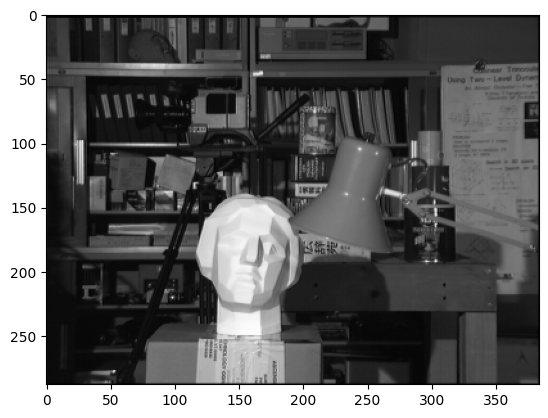

In [83]:
plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))

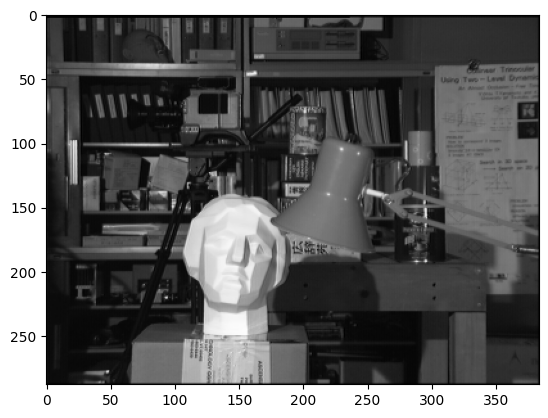

In [84]:
plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))

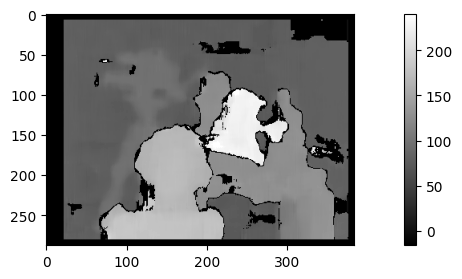

In [85]:
#視差
stereo = cv2.StereoBM.create(numDisparities=16, blockSize=15)
disparity_px = stereo.compute(imgL, imgR)

# raw output
plt.figure(figsize=(13,3))
plt.imshow(disparity_px, cmap="gray")
plt.colorbar()
plt.show()

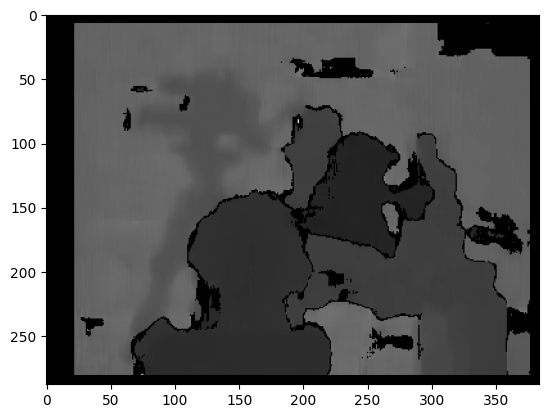

In [86]:
#深度マップ推定


fov = 90  # [deg]
base_line = 20  # [cm]
width = disparity_px.shape[1]  # [px]
#focus = 1.0 # [cm]

# focus: px per cm
fov_ = fov * np.pi / 180  # [rad]
focus = (width/2) / np.tan(fov_/2)  # focus = f 

# convert disparity to depth
with np.errstate(divide='ignore'):
 depth = np.where( disparity_px>0.0001, base_line * focus / disparity_px,0)
# this line above is equivalent to the line below
# depth = b * f / (disparity_px / ratio)

# set unexpected values to zero 
depth[np.where(depth < 0)] = 0
depth[np.where(depth > 500)] = 0

# show result
plt.imshow(depth,cmap="gray")